## MovieLens Data Exploration and Recommendation Engine using Deep Learning

This data science project embarks on a comprehensive exploration of the expansive MovieLens dataset to unearth valuable insights about movie preferences and create an advanced recommendation engine. Leveraging deep learning techniques, the project combines data analysis, neural networks, and collaborative filtering to provide users with highly personalized movie recommendations based on their preferences.

The Dataset contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. 

#### Project Objectives:-

This project exploring the MovieLens dataset and creating a deep learning recommendation engine can benefit several groups of stakeholders:

**Movie Enthusiasts:** Movie lovers looking for personalized movie recommendations tailored to their tastes will benefit from this project. The recommendation engine will enhance their movie-watching experience by suggesting films they are more likely to enjoy.

**Streaming Platforms:** Streaming platforms like Netflix, Amazon Prime, or Hulu can benefit from the insights generated by this project. They can implement similar recommendation engines to increase user engagement, retention, and satisfaction. Improved recommendations can lead to longer subscriptions and increased revenue.

**Movie Studios and Distributors:** Understanding user preferences and genre trends can help movie studios and distributors make informed decisions about the types of films to produce, market, or acquire for distribution. This can optimize their investments and increase box office or streaming revenue.

**Content Creators:** Independent filmmakers and content creators can use insights from this project to understand what types of movies are popular among certain demographics. This knowledge can guide their creative and marketing strategies.

### Project Structure:-

The Project has the below structure:-

**1. Sourcing & Loading**
- Import relevant libraries
- Load the data 

**2. Cleaning, Transforming & Visualizing**
- Exploring the data
- Fix Missing Data
- Visualizing the Data
- Finding Different Trends in Data

**3. Data Preprocessing**
- Implicit & Explicit Feedback
- Data Selection
- Splitting Training & Test Data

**4. Modelling**
- Neural Collaborative Filtering

**4. Model Evaluation**
- Hit Ratio@10

**5. Conclusion**
- Inference

### 1. Sourcing & Loading

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import pytorch_lightning as pl
warnings.filterwarnings('ignore')

In [82]:
#pip install torch

     -------------------------------------- 172.4/172.4 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [84]:
#pip install pytorch-lightning

     -------------------------------------- 727.7/727.7 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 805.2/805.2 kB 1.2 MB/s eta 0:00:00
     ------------------------------------ 327.1/327.1 kB 923.7 kB/s eta 0:00:00
     ---------------------------------------- 61.7/61.7 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 44.7/44.7 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from tqdm import tqdm

In [4]:
#load the Data

df_movies = pd.read_csv('Datasets\movie.csv')

In [5]:
df_gen_tag= pd.read_csv('Datasets\genome_tags.csv')

In [6]:
df_tags   = pd.read_csv(r'Datasets\tag.csv')

In [7]:
df_rating = pd.read_csv(r'Datasets\rating.csv')

In [8]:
df_gen_sco= pd.read_csv('Datasets\genome_scores.csv')

In [9]:
df_link  = pd.read_csv(r'Datasets\link.csv')

### 2. Cleaning, Transforming & Visualizing

#### Exploring the data

In [10]:
df_movies.name = 'Movies_DF'
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
df_gen_tag.name = 'Genome_Tag_DF'
df_gen_tag.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [12]:
df_tags.name = 'Tags_DF'
df_tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,4/24/2009 18:19
1,65,208,dark hero,5/10/2013 1:41
2,65,353,dark hero,5/10/2013 1:41
3,65,521,noir thriller,5/10/2013 1:39
4,65,592,dark hero,5/10/2013 1:41


In [13]:
df_rating.name = 'Ratings_DF'
df_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [14]:
df_gen_sco.name = 'Genome_Score_DF'
df_gen_sco.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [15]:
df_link.name = 'Link_DF'
df_link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
def exploring_dfs(*dfs):
    for df in dfs:
        rows, cols = df.shape
        df_name = df.name if hasattr(df,'name') else 'Unnamed'
        print(f'\n{df_name} has {rows} Rows and {cols} Columns')
        #print(f'\n{df_name} has the below Summary:\n')
        #print(df.info())
        null_vals = df.isnull().sum()
        null_cols = null_vals[null_vals > 0]
        if not null_cols.empty:
            print(f'\n{df_name} has Null Values and they are as below:\n')
            for col, count in null_cols.items():
                print(f'- {col} has {count} Null Values')
                print(f'\n{df_name} has the below Summary:\n')
                print(df.info())
                print(df.describe())
        else:
            print(f'\n{df_name} has no Null Values')

In [17]:
exploring_dfs(df_movies, df_rating, df_tags, df_gen_tag, df_gen_sco,df_link)


Movies_DF has 27278 Rows and 3 Columns

Movies_DF has no Null Values

Ratings_DF has 20000263 Rows and 4 Columns

Ratings_DF has no Null Values

Tags_DF has 465564 Rows and 4 Columns

Tags_DF has Null Values and they are as below:

- tag has 16 Null Values

Tags_DF has the below Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.2+ MB
None
              userId        movieId
count  465564.000000  465564.000000
mean    68712.354263   32627.762920
std     41877.674053   36080.241157
min        18.000000       1.000000
25%     28780.000000    2571.000000
50%     70201.000000    7373.000000
75%    107322.000000   62235.000000
max    138472.0

In [18]:
#Exploring the Movie DF
df_movies['year']  = df_movies['title'].str.extract(r'\((\d{4})\)')
df_movies['title'] = df_movies['title'].str[:-7] 

In [19]:
df_movies.shape

(27278, 4)

In [20]:
#Segregating the Genres of the Movies to find which Genre they belong
df_movies = df_movies.join(df_movies['genres'].str.get_dummies().astype(bool))

In [21]:
df_movies.drop(columns=['genres'],axis=1,inplace=True)

In [22]:
df_movies.rename(columns = {'(no genres listed)': ' No Genre'}, inplace=True)

In [23]:
df_movies.head()

,movieId,title,year,No Genre,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


From this Dataset, we can derive various insights like below:-

1. How many Movies are Released every Year?
2. How many Movies are released Every Year Genre wise?
3. What is the most popular Genre Type over the years?

##### 1. Finding the Number of Movies Released per Year and in last 15 years

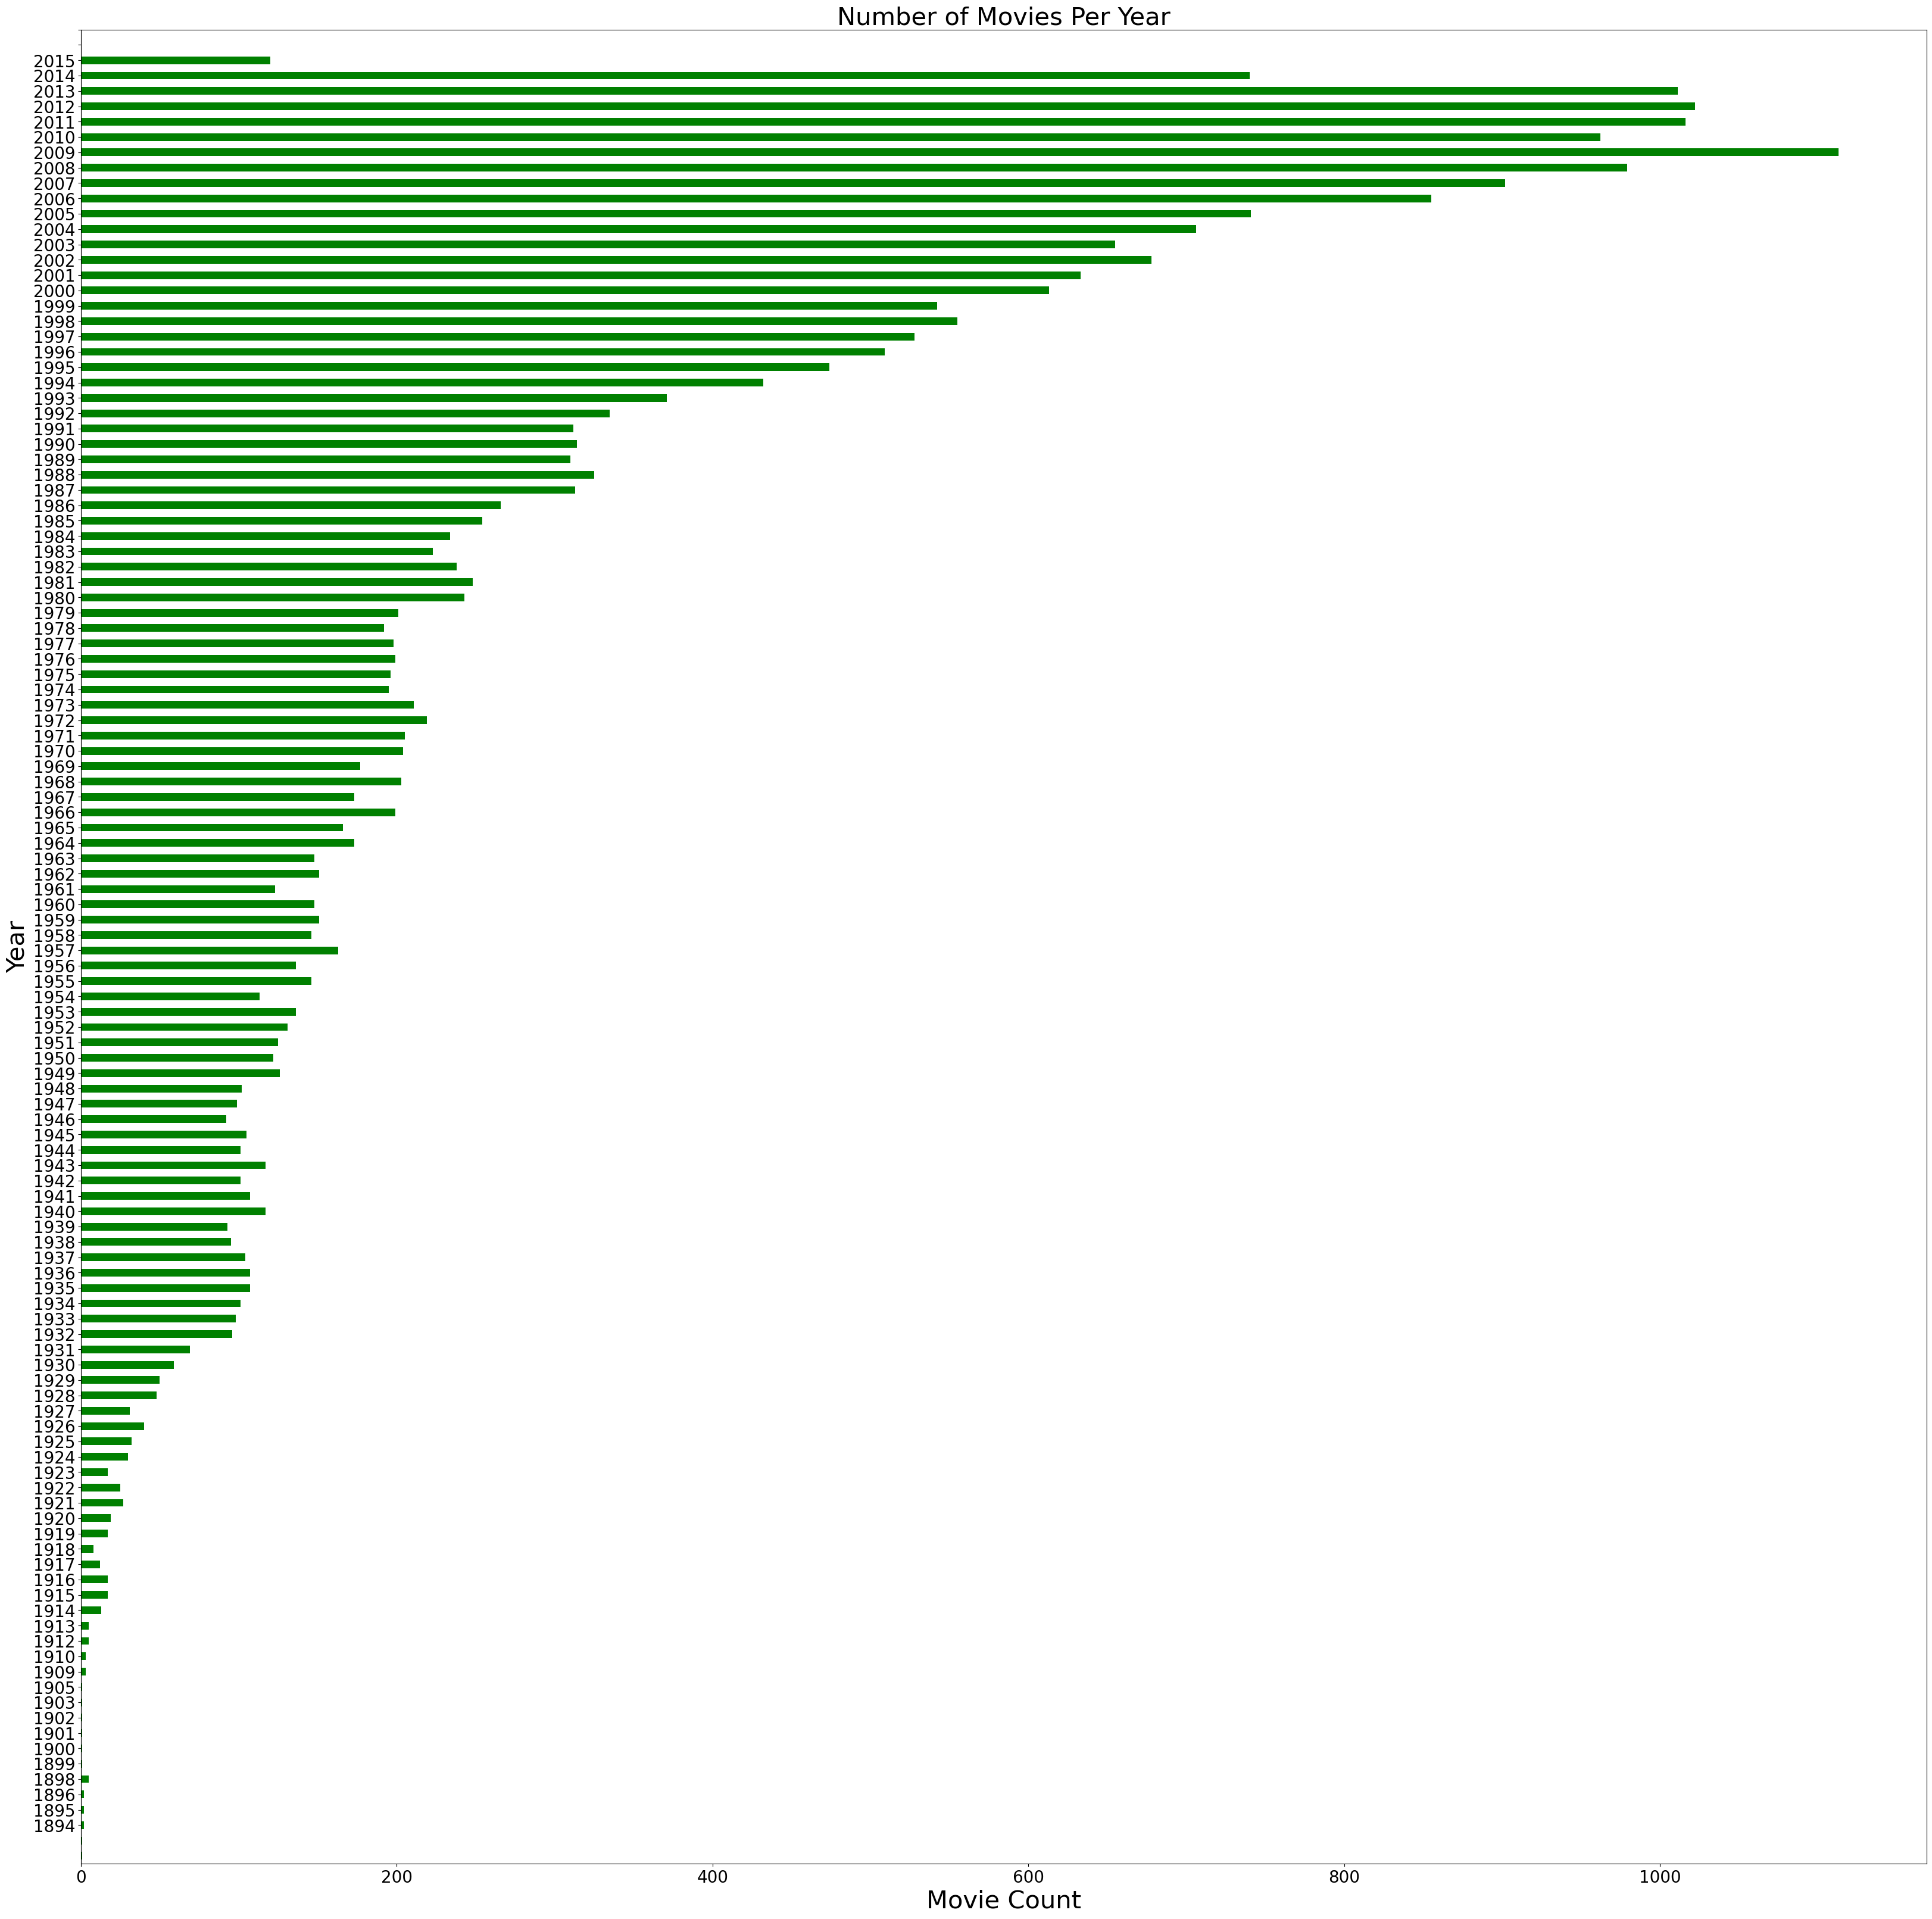

In [24]:
# Movie Count across years
movie_year = df_movies.groupby('year')['title'].count()
ax = movie_year.plot.barh(x='movies',y='year',figsize=(40,40),color='g')
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_title('Number of Movies Per Year',fontsize=30)
ax.set_xlabel('Movie Count',fontsize=30)
ax.set_ylabel('Year',fontsize=30)
label_spacing = 2
y_positions = [tick.get_position()[1] + label_spacing for tick in ax.get_yticklabels()]
ax.set_yticks(y_positions)
plt.show()
#ax.set_yticklabels(movie_year['year'])
#ax.set_yticklabels(movie_year['year']) 
#ax.tick_params(axis='x',labelsize=20)
#ax.tick_params(axis='y',labelsize=20)

In [25]:
# finding Movie Count in last 15 years
movies_15yrs = df_movies.groupby('year')['title'].count().tail(15)

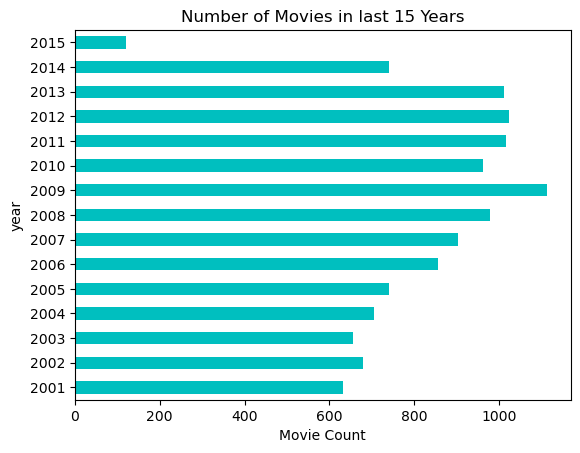

In [26]:
ax = movies_15yrs.plot.barh(x='movies',y='year', title= 'Number of Movies in last 15 Years',color='c')
ax.set_xlabel('Movie Count')
plt.show()

##### 2. Finding the Number of Genres of Movies released till date

In [27]:
melted_df1 = df_movies.copy()
melted_df1.drop(columns=['movieId', 'title'],axis=1,inplace=True)
#melted_df = melted_df1.melt(id_vars='year', var_name='Genre', value_name='Count')

In [28]:
melted_df = melted_df1.melt(id_vars='year', var_name='Genre', value_name='Count')

In [29]:
genre_count_till_date = melted_df.groupby('Genre')['Count'].sum().reset_index()

In [30]:
genre_count_till_date

,Genre,Count
0,No Genre,246
1,Action,3520
2,Adventure,2329
3,Animation,1027
4,Children,1139
5,Comedy,8374
6,Crime,2939
7,Documentary,2471
8,Drama,13344
9,Fantasy,1412


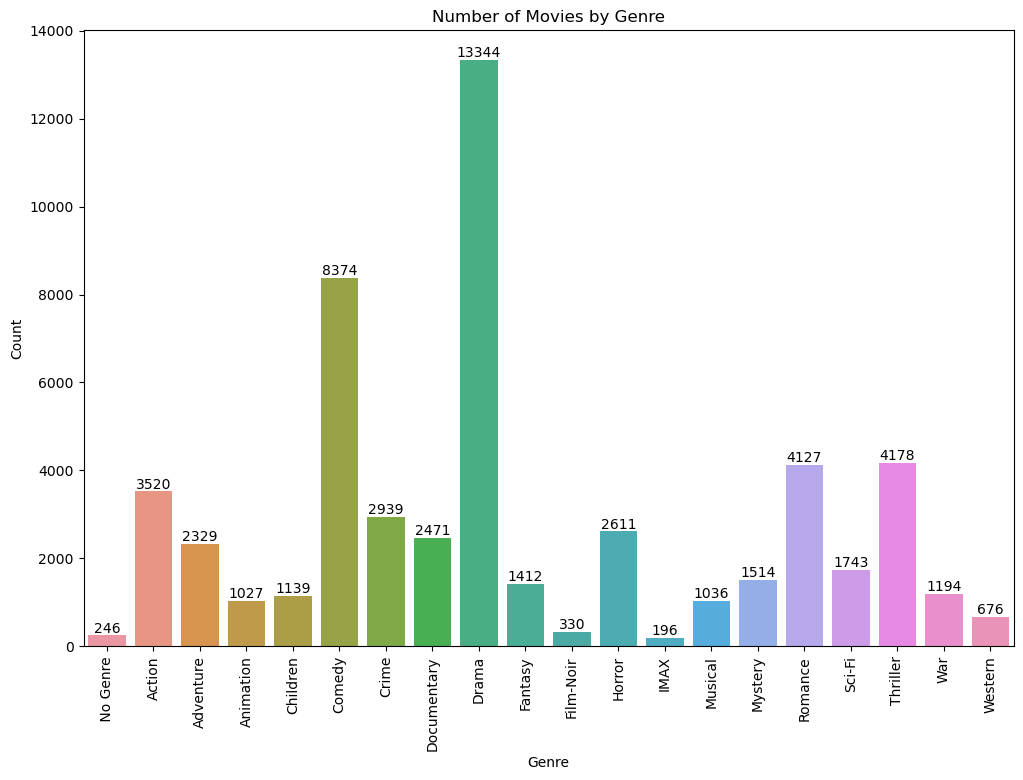

In [31]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=genre_count_till_date,x='Genre',y='Count')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Movies by Genre')
for index, row in genre_count_till_date.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')

plt.show()

#### Drama seems to be the Most Popular Genre followed by Comedy & Thrillers. Romantic Movies follows very closely.

#### We now explore the Reting Dataset to derive meaningful insights from this. 

#### Let us now find the Popular Movies Rating Wise. We would explore the below questions:-

1. What are the Top 10 Highest Rated Movies in last 15 years?

2. Which Movie got the Highest Overall Rating in last 15 years?

3. What is the Count of Unique users who have rated in last 15 years?

4. Which Userid has given the highest number of Ratings?

In [32]:
df_rating['timestamp'] = pd.to_datetime(df_rating['timestamp'], errors='coerce')
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['time'] = df_rating['timestamp'].dt.time
df_rating['date'] = df_rating['timestamp'].dt.date

In [33]:
# Finding the Unique Ratings we have along with the Count per year
print('Number of Unique Ratings:',df_rating['rating'].unique())

Number of Unique Ratings: [3.5 4.  3.  4.5 5.  2.  1.  2.5 0.5 1.5]


In [34]:
#Finding Counts of Ratings
df_rating['rating'].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [35]:
# Finding the Average Rating
print('The Average Rating of Movies is:', round(df_rating['rating'].mean(),2))

The Average Rating of Movies is: 3.53


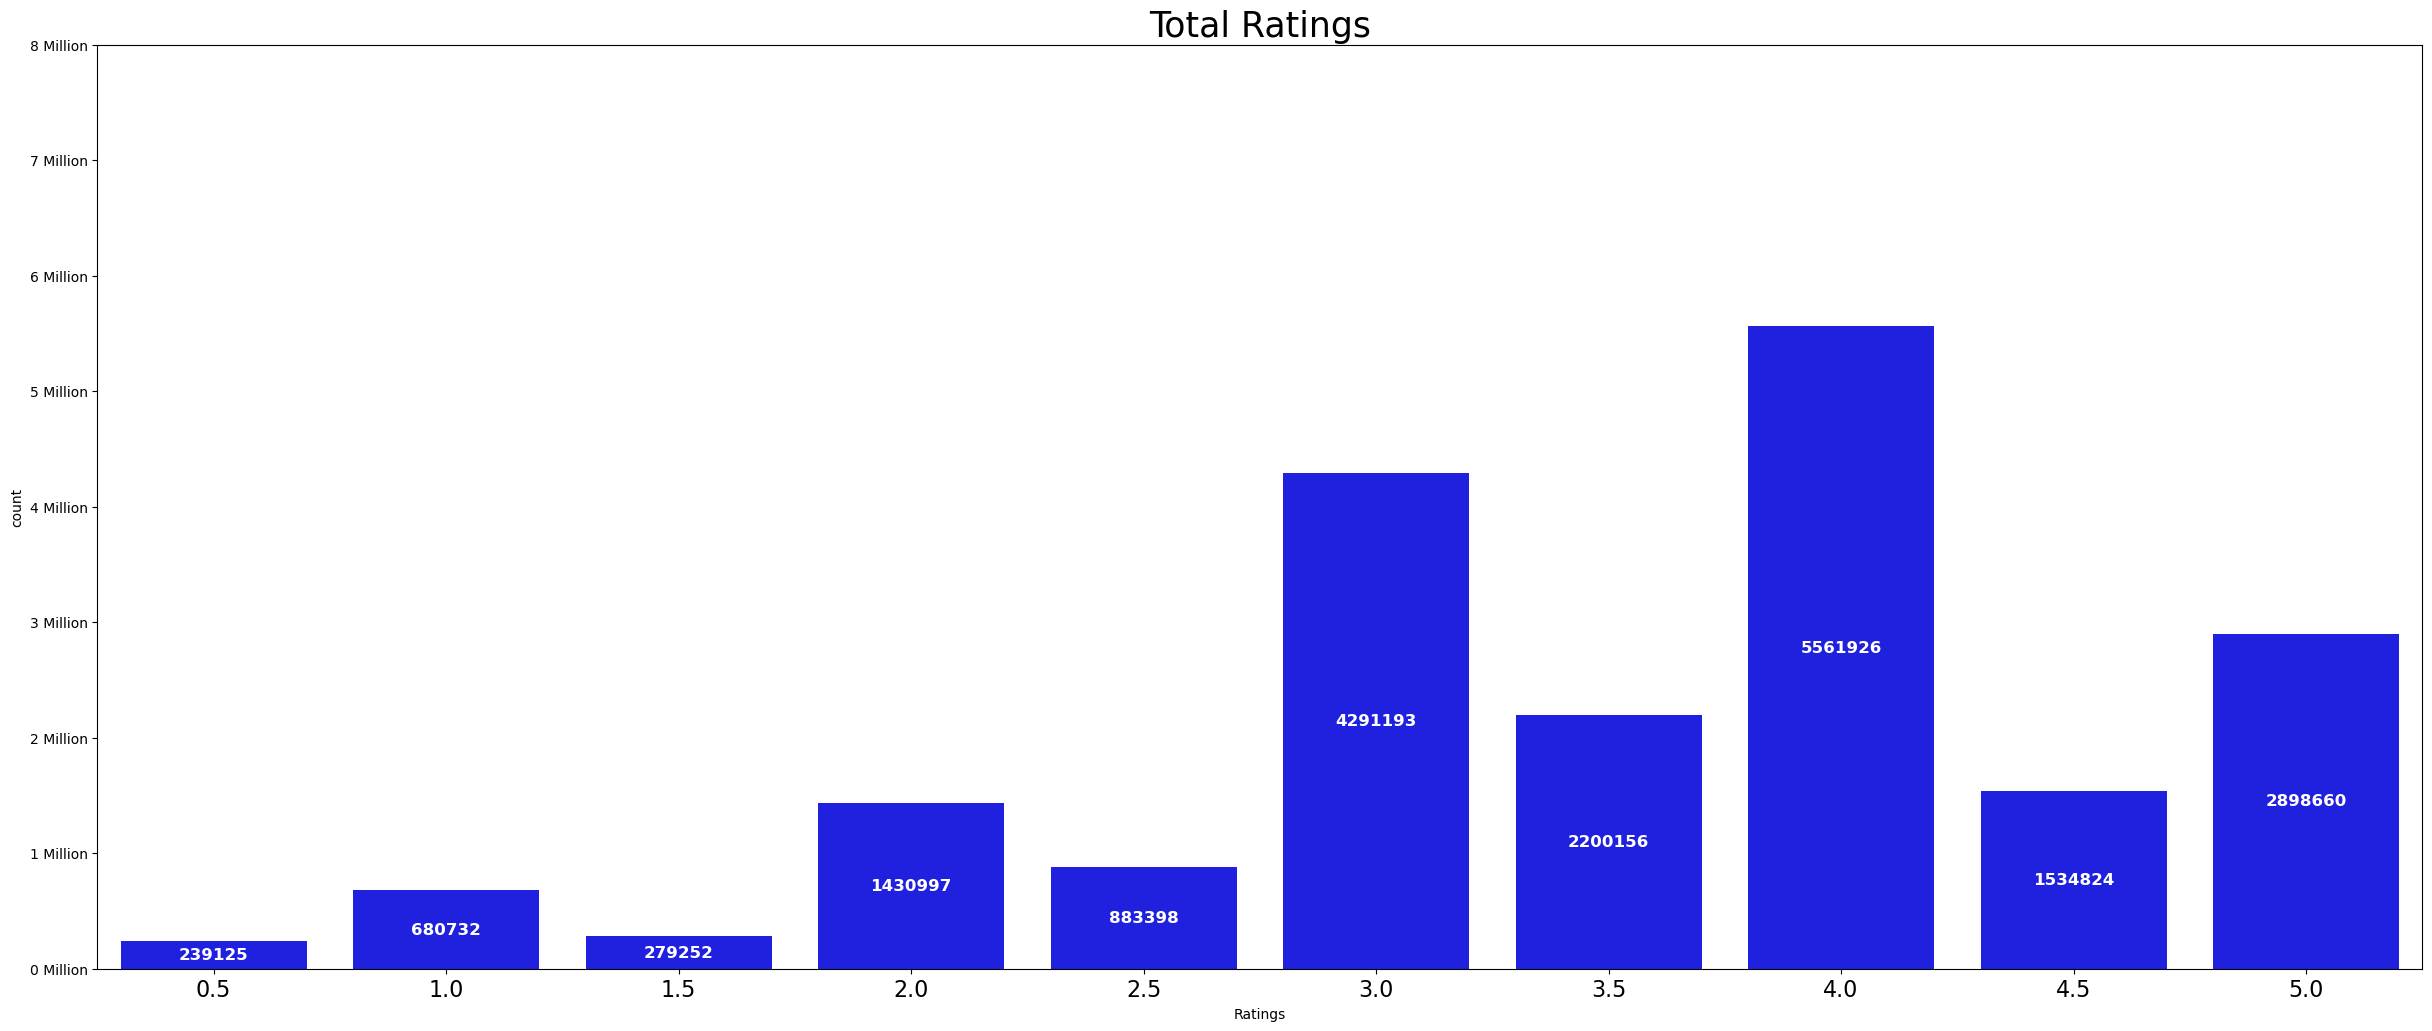

In [36]:
# Let us Visualize the Distribution of Rating in the Dataset
plt.figure(figsize= (30, 12))

ax = sns.countplot(data = df_rating, x ='rating',
            color = 'blue')
ax.set_ylim(0, 8000000)
ylabels = ['{:.0f}'.format(x) + ' Million' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = i.get_height(), 
            ha = 'center', va ='center', size = 12, weight = 'bold', rotation = 0, color = 'white')
    
plt.title('Total Ratings', size= 25)
plt.xlabel("Ratings")
plt.xticks(size= 16)

plt.show()

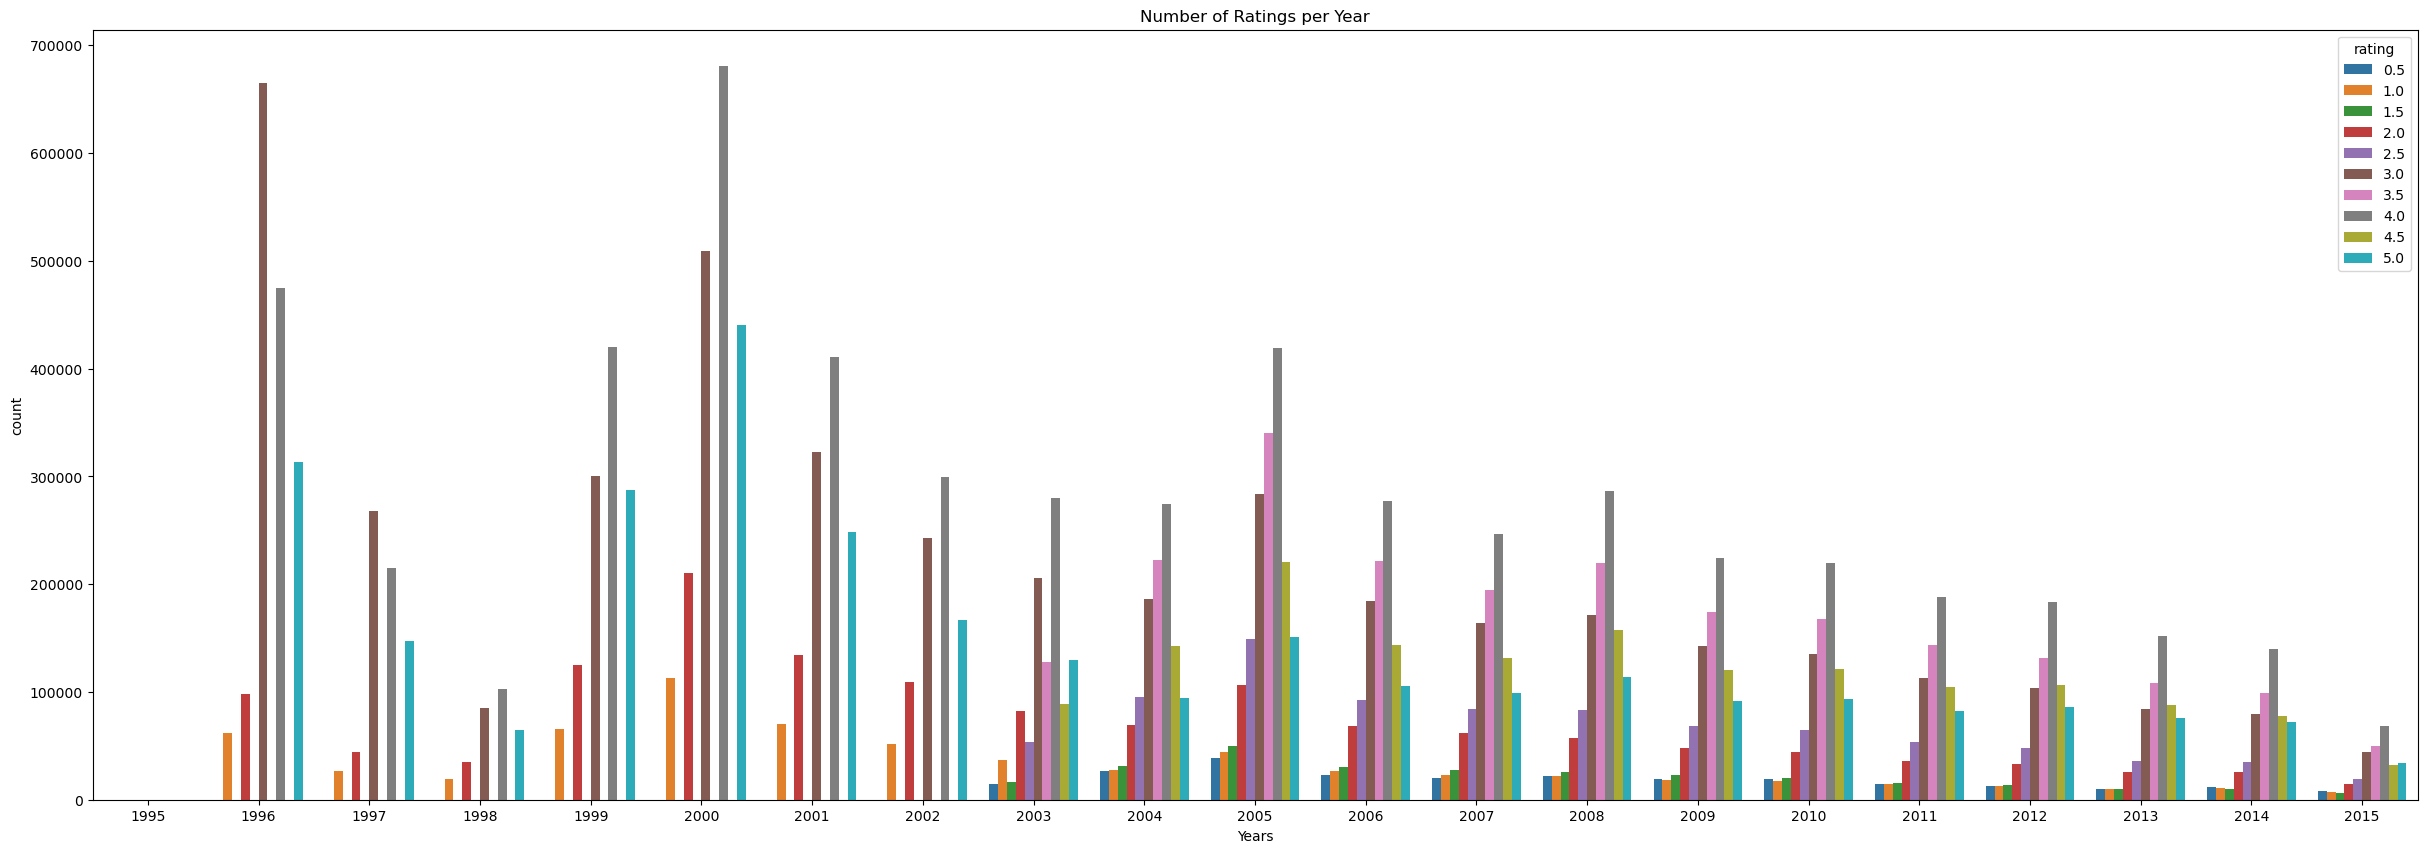

In [37]:
#Finding the Distribution of Rating across Years
plt.figure(figsize=(30,10))

sns.countplot(data=df_rating, x='year',hue='rating')
plt.xlabel('Years')
plt.title('Number of Ratings per Year')
plt.show()

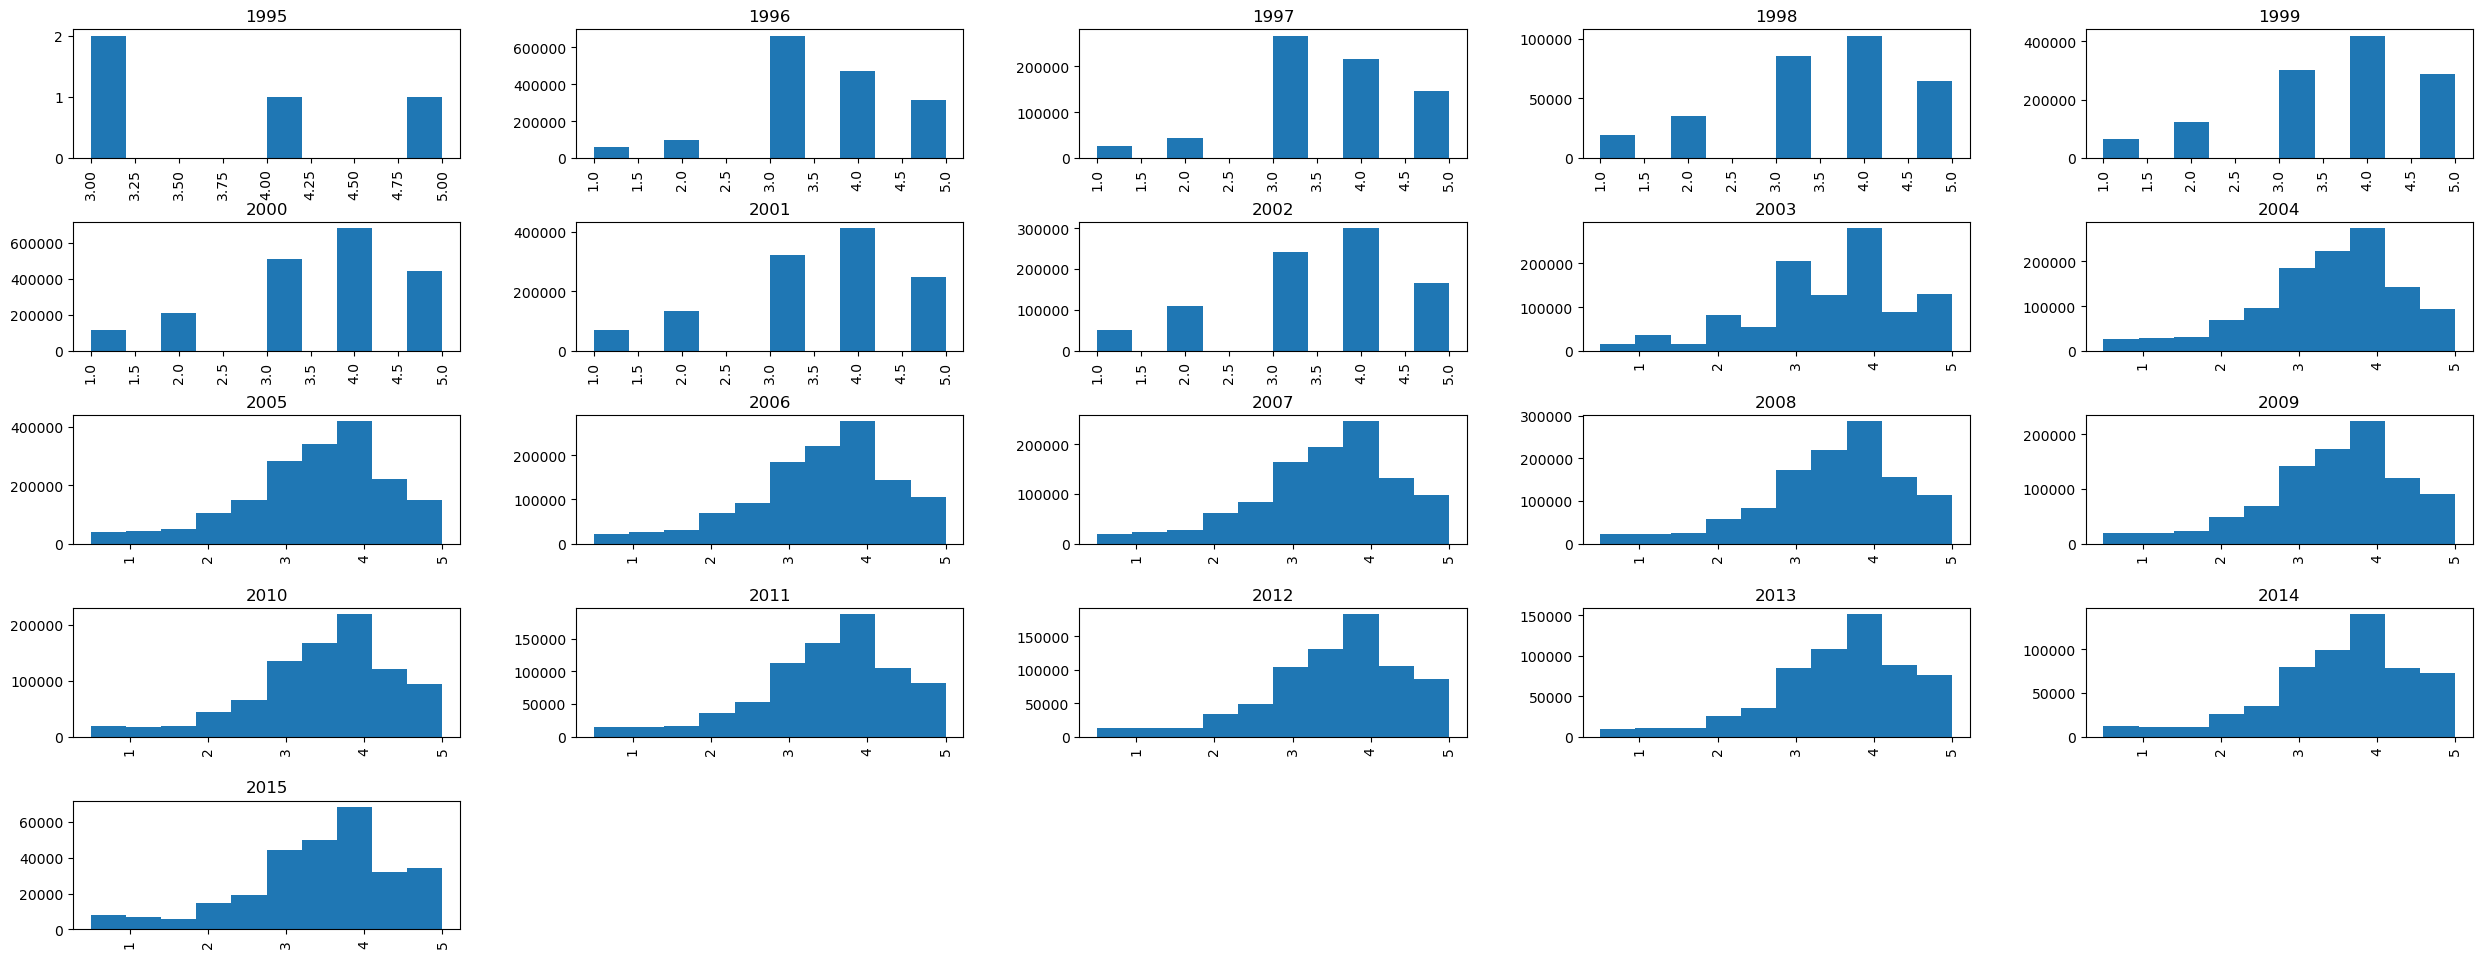

In [38]:
df_rating['rating'].hist(by=df_rating['year'], figsize=(30, 12));

In [39]:
#We join the Movies Dataset with Rating Dataset 

df_movie_rating = pd.merge(df_movies, df_rating,on='movieId')

In [40]:
df_movie_rating.head()

,movieId,title,year_x,No Genre,Action,Adventure,Animation,Children,Comedy,Crime,...,Thriller,War,Western,userId,rating,timestamp,year_y,month,time,date
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,3,4.0,1999-12-11 13:36:47,1999,12,13:36:47,1999-12-11
1,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,6,5.0,1997-03-13 17:50:52,1997,3,17:50:52,1997-03-13
2,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,8,4.0,1996-06-05 13:37:51,1996,6,13:37:51,1996-06-05
3,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,10,4.0,1999-11-25 02:44:47,1999,11,02:44:47,1999-11-25
4,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,11,4.5,2009-01-02 01:13:41,2009,1,01:13:41,2009-01-02


#### Let us now find the Popular Movies Rating Wise. We would explore the below questions:-

1. What are the Top 10 Highest Rated Movies in last 15 years?

2. Which Movie got the Highest Overall Rating in last 15 years?

3. What are the Top 10 Movies with highest number of User Ratings in last 15 years?

4. What is the Count of Unique users who have rated in last 15 years?

5. Which Userid has given the highest number of Ratings?

In [41]:
# Finding the Top 10 movies in last 15 years
current_year = pd.Timestamp.now().year

In [42]:
last_15_yrs_movies = df_movie_rating[df_movie_rating.year_y >= (current_year - 15)]

In [43]:
average_ratings = last_15_yrs_movies.groupby('title')['rating'].mean().reset_index()

In [44]:
top_10_movies = average_ratings.sort_values(by='rating',ascending=False)

In [45]:
top_10 = top_10_movies.head(10)

#### 1. What are the Top 10 Highest Rated Movies in last 15 years?

In [46]:
print('Top 10 Movies in last 15 Years are:\n',top_10)

Top 10 Movies in last 15 Years are:
                                   title  rating
20439  Snow Queen, The (Lumikuningatar)     5.0
22195                 The Color of Milk     5.0
19009                             Rosie     5.0
21436                        Sun Kissed     5.0
16705                           Oranges     5.0
7528         Eye In The Sky (Gun chung)     5.0
20358                       Small Roads     5.0
25389                       Yonkers Joe     5.0
21414      Summer Wishes, Winter Dreams     5.0
16114           No Distance Left to Run     5.0


#### 2. Which Movie got the Highest Overall Rating in last 15 years?

In [47]:
print('The Movie with the Highest Overall User Rating is', top_10['title'].iloc[0])

The Movie with the Highest Overall User Rating is Snow Queen, The (Lumikuningatar)


#### 3. What are the Top 10 Movies with highest number of User Ratings in last 15 years?

In [48]:
user_count = last_15_yrs_movies.groupby('title')['userId'].count().reset_index()

In [49]:
user_count= user_count.sort_values(by='userId',ascending=False)

In [50]:
top_10_by_user_ratings = user_count.head(10)

In [51]:
print('The Top 10 Movies to get Highest Number of User Ratings in last 15 years are:\n',top_10_by_user_ratings[['title','userId']])

The Top 10 Movies to get Highest Number of User Ratings in last 15 years are:
                                                    title  userId
5661                                    Dark Knight, The   20438
14532                                        Matrix, The   20117
19887                          Shawshank Redemption, The   19712
7907                                          Fight Club   19146
18017                                       Pulp Fiction   17812
8354                                        Forrest Gump   17358
13639  Lord of the Rings: The Fellowship of the Ring,...   17015
13640     Lord of the Rings: The Return of the King, The   16227
13641             Lord of the Rings: The Two Towers, The   15572
20094                          Silence of the Lambs, The   15089


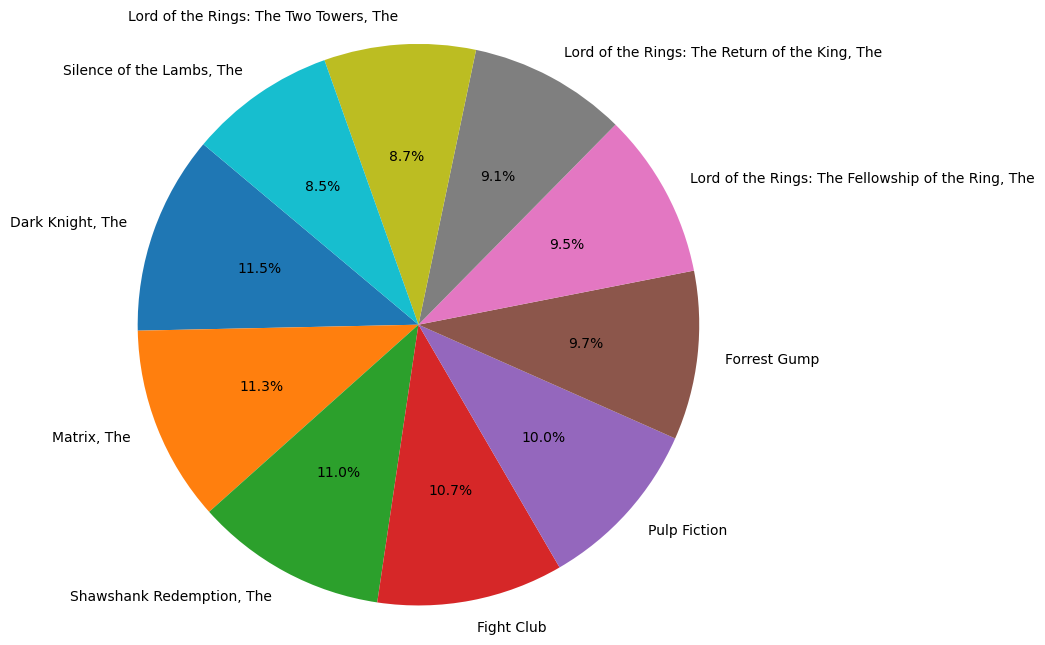

In [52]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_by_user_ratings['userId'], labels=top_10_by_user_ratings['title'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### 4. What is the Count of Unique users who have rated in last 15 years?

In [53]:
unique_users_count = last_15_yrs_movies['userId'].nunique()

In [54]:
print("Number of Unique User Id's to Rate Movies in last 15 years is",unique_users_count)

Number of Unique User Id's to Rate Movies in last 15 years is 42724


#### 5. Which Userid has given the highest number of Ratings?

In [55]:
user_id_rating = last_15_yrs_movies.groupby('userId')['rating'].count().reset_index()
user_id_rating = user_id_rating.sort_values(by='rating',ascending=False)
user_id_rating = user_id_rating.head(10)
user_id_rating

,userId,rating
40716,131904,5330
40324,130767,4785
4830,15617,4354
14445,46470,4094
19642,63147,3958
40229,130459,3908
9734,31122,3742
5674,18138,3650
28559,92269,3508
32650,105580,3449


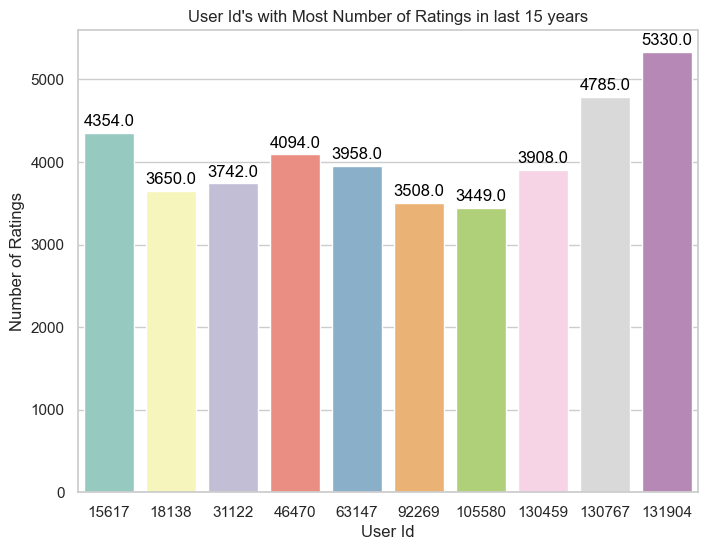

In [56]:
#Let us visualize the Top 10 User id's who have given the highest number of Ratings

sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  
ax = sns.barplot(x=user_id_rating['userId'], y=user_id_rating['rating'], palette="Set3")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("User Id's with Most Number of Ratings in last 15 years")
plt.xlabel('User Id')
plt.ylabel('Number of Ratings')
plt.show()

### 3. Data Preprocessing

The Goal of this Project is to define a Recommendation System which would suggest Movies based on User Interaction. It is worth noting that we have 2 Types of Feedback based on which we can build our Recommendation System. They are explained as below:-

##### 1. Explicit Feedback:-

Under this type of Recommendation System, we build the Model based on Direct & Quantifiable Data collected from Users. For e.g. User Reviews or User Likes. However, this is not a great way of building the Recommendation System as there is a vast majority of users who do not provide User Reviews in Product websites like Amazon, Walmart or do not press Like Buttons in Facebook or Youtube.  

##### 2. Implicit Feedback:-

In this type of Recommendation System, we build our model based on the user interaction of a Product, Movie or Videos. For example, if an user watches a Movie or Video, we can suggest movies or videos based on the Genre of those. Similarly, if a user has browsed an item on Amazon or Walmart website, we can suggest similar items to the user.

The advantage of Implicit Feedback is the abundance of data we have at our disposal. However, the one advantage is that we have no way to find the negative feedback of the user on a particular item or movie.

#### Data Selection:-

Since the Dataset has 20 Million Rows, it is beyond the scope of our Limited Hardware that we have to build a Deep Learning Model with this huge amount of Data. So we would build our model by selecting random 20% of the User data.

In [57]:
random_users = np.random.choice(df_rating['userId'].unique(), size= int(len(df_rating['userId'].unique())*0.2),replace=False)

In [58]:
df_trunc_rating = df_rating.loc[df_rating['userId'].isin(random_users)]

In [59]:
print('Number of Rows of Data:',df_trunc_rating.shape[0])

Number of Rows of Data: 4033247


In [60]:
print("Number of Unique User Id's in our Dataset is", df_trunc_rating['userId'].nunique())

Number of Unique User Id's in our Dataset is 27698


In [61]:
df_trunc_rating.sample(10)

,userId,movieId,rating,timestamp,year,month,time,date
16426273,113703,7067,5.0,2006-02-23 21:48:39,2006,2,21:48:39,2006-02-23
15952938,110392,1027,3.5,2005-07-02 09:15:06,2005,7,09:15:06,2005-07-02
3415466,23285,68159,4.0,2011-01-09 17:15:55,2011,1,17:15:55,2011-01-09
10303567,71254,1345,4.0,2001-02-12 20:21:09,2001,2,20:21:09,2001-02-12
11872719,81910,3751,4.0,2001-07-29 18:31:40,2001,7,18:31:40,2001-07-29
3065843,20899,8157,4.0,2006-06-24 10:50:16,2006,6,10:50:16,2006-06-24
16838703,116453,4389,4.0,2007-03-24 14:45:43,2007,3,14:45:43,2007-03-24
10609377,73373,2381,4.0,2000-03-24 04:17:02,2000,3,04:17:02,2000-03-24
10424679,72085,64614,5.0,2011-02-05 18:23:07,2011,2,18:23:07,2011-02-05
15198708,105059,1359,2.5,2007-05-02 23:34:57,2007,5,23:34:57,2007-05-02


Each row in the dataframe corresponds to a movie review made by a single user.

In [62]:
df = df_trunc_rating.copy()

In [63]:
df.shape

(4033247, 8)

For our Training & Validation Stage, we will implement the **Leave-One-Out** methodology using the Timestamp Feature of the Dataframe. We will take all previous ratings given by the user in our Training Set keeping the latest one in the Testing Set. 

In [64]:
#Checking all the Ratings of a User-id
df[df['userId']== 15131].sort_values(by='timestamp')

,userId,movieId,rating,timestamp,year,month,time,date


UserId 15131 last reviewed Movie id  2701 on 2006-03-21 at 17:18 Hours. We keep this in our Test Set while all other reviews in our Training Set.

In [65]:
# Finding the Rank of all Rows based on the Timestamp. Latest Timestamp will have Rank 1 and so on.
df['rank_latest'] = df.groupby(['userId'])['timestamp'].rank(method='first', ascending=False)

In [66]:
df.head()

,userId,movieId,rating,timestamp,year,month,time,date,rank_latest
423,4,6,3.0,1996-08-24 09:33:47,1996,8,09:33:47,1996-08-24,11.0
424,4,10,4.0,1996-08-24 09:28:42,1996,8,09:28:42,1996-08-24,24.0
425,4,19,3.0,1996-08-24 09:29:54,1996,8,09:29:54,1996-08-24,18.0
426,4,32,1.0,1996-08-24 09:31:01,1996,8,09:31:01,1996-08-24,15.0
427,4,165,3.0,1996-08-24 09:27:32,1996,8,09:27:32,1996-08-24,27.0


As discussed above, we split our Data based on the Rank. Training Set will have all data except the Row with Rank 1 for an user.

In [67]:
train_data = df[df['rank_latest']!=1]
test_data  = df[df['rank_latest']==1]

In [68]:
train_data.shape

(4005549, 9)

In [69]:
test_data.shape

(27698, 9)

The Goal of this Project is to recommend a movie to an user based on their past viewing data. However, the Rating Dataset can be used also to predict the Rating each user can give for a movie too. But this is not our intention.

We use the Ratings Dataset to presume user's interaction with a movie in order to determine the likely movies he can watch based on our Recommendation (Implicit Feedback). In order to do this, we would simplify our Ratings Dataset to add a new column 'Viewed' having a value of 1 denoting user's interaction with that movie.

In [70]:
train_data['viewed'] = 1

In [71]:
test_data['viewed'] = 1

In [72]:
train_data.head()

,userId,movieId,rating,timestamp,year,month,time,date,rank_latest,viewed
423,4,6,3.0,1996-08-24 09:33:47,1996,8,09:33:47,1996-08-24,11.0,1
424,4,10,4.0,1996-08-24 09:28:42,1996,8,09:28:42,1996-08-24,24.0,1
425,4,19,3.0,1996-08-24 09:29:54,1996,8,09:29:54,1996-08-24,18.0,1
426,4,32,1.0,1996-08-24 09:31:01,1996,8,09:31:01,1996-08-24,15.0,1
427,4,165,3.0,1996-08-24 09:27:32,1996,8,09:27:32,1996-08-24,27.0,1


In [73]:
# dropping the columns we no longer need

train_data = train_data.drop(columns=['rating','timestamp','year','month','date','rank_latest','time'],axis=1)
test_data = test_data.drop(columns=['rating','timestamp','year','month','date','time','rank_latest'],axis=1)

In [74]:
train_data.head()

,userId,movieId,viewed
423,4,6,1
424,4,10,1
425,4,19,1
426,4,32,1
427,4,165,1


In [75]:
test_data.head()

,userId,movieId,viewed
445,4,548,1
511,5,1136,1
1231,11,5971,1
1500,13,1,1
2125,20,1994,1


After binarizing our dataset, we see that every sample in the dataset now belongs to the positive class. However we also require negative samples to train our models, to indicate movies that the user has not interacted with. We assume that such movies are those that the user are not interested in - even though this is a sweeping assumption that may not be true, it usually works out rather well in practice.

We assume that there are 4 Negative Classes for each Positive class of Data. 

In [76]:
# Get a list of all movie IDs
all_movieIds = df['movieId'].unique()

# Placeholders that will hold the training data
users, items, labels = [], [], []

# This is the set of items that each user has interaction with
user_item_set = set(zip(train_data['userId'], train_data['movieId']))

# 4:1 ratio of negative to positive samples
negative_sample = 4

for (u, i) in tqdm(user_item_set):
    users.append(u)
    items.append(i)
    labels.append(1) # items that the user has interacted with are positive
    for _ in range(negative_sample):
        # randomly select an item
        negative_item = np.random.choice(all_movieIds) 
        # check that the user has not interacted with this item
        while (u, negative_item) in user_item_set:
            negative_item = np.random.choice(all_movieIds)
        users.append(u)
        items.append(negative_item)
        labels.append(0) # items not interacted with are negative

100%|█████████████████████████████████████████████████████████████████████| 4005549/4005549 [02:44<00:00, 24293.33it/s]


In [99]:
class MovieLensTrainDataset(Dataset):
    """MovieLens PyTorch Dataset for Training
    
    Args:
        df (pd.DataFrame): Dataframe containing the movie ratings
        all_movieIds (list): List containing all movieIds
    
    """

    def __init__(self, ratings, all_movieIds):
        self.users, self.items, self.labels = self.get_dataset(df, all_movieIds)

    def __len__(self):
        return len(self.users)
  
    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.labels[idx]

    def get_dataset(self, df, all_movieIds):
        users, items, labels = [], [], []
        user_item_set = set(zip(df['userId'], df['movieId']))

        num_negatives = 4
        for u, i in user_item_set:
            users.append(u)
            items.append(i)
            labels.append(1)
            for _ in range(num_negatives):
                negative_item = np.random.choice(all_movieIds)
                while (u, negative_item) in user_item_set:
                    negative_item = np.random.choice(all_movieIds)
                users.append(u)
                items.append(negative_item)
                labels.append(0)

        return torch.tensor(users), torch.tensor(items), torch.tensor(labels)

### 4. Modelling:-

### Neural Collaborative Filtering (NCF):-

#### User Embeddings:-

User embeddings are a fundamental concept in recommendation systems and machine learning, particularly in collaborative filtering-based recommendation systems. User embeddings represent users in a lower-dimensional vector space, where each user is represented by a unique vector. These vectors capture latent features or characteristics of users based on their historical interactions with items (e.g., movies, products, articles) or other relevant data.

Each user is represented by a unique vector that captures their movie preferences and behavior based on their past ratings and interactions with movies. Users with similar preferences have similar embeddings.

#### Learned Embeddings:-

Learned embeddings refer to low-dimensional, dense vectors that are automatically derived from the dataset's user-item interactions. These embeddings represent users and movies in a way that captures meaningful patterns and relationships based on historical movie ratings and preferences.

Learned embeddings are used to make movie recommendations. For example, to recommend movies to a specific user, the system can find movies with embeddings that are close to the user's embedding in the embedding space. This means recommending movies that users with similar preferences have liked.

In [113]:
class NCF(pl.LightningModule):
    """ Neural Collaborative Filtering (NCF)
    
        Args:
            num_users (int): Number of unique users
            num_items (int): Number of unique items
            df (pd.DataFrame): Dataframe containing the movie ratings for training
            all_movieIds (list): List containing all movieIds (train + test)
    """
    
    def __init__(self, num_users, num_items, df, all_movieIds):
        super().__init__()
        self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=8)
        self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=8)
        self.fc1 = nn.Linear(in_features=16, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.output = nn.Linear(in_features=32, out_features=1)
        self.df = df
        self.all_movieIds = all_movieIds
        
    def forward(self, user_input, item_input):
        
        # Pass through embedding layers
        user_embedded = self.user_embedding(user_input)
        item_embedded = self.item_embedding(item_input)

        # Concat the two embedding layers
        vector = torch.cat([user_embedded, item_embedded], dim=-1)

        # Pass through dense layer
        vector = nn.ReLU()(self.fc1(vector))
        vector = nn.ReLU()(self.fc2(vector))

        # Output layer
        pred = nn.Sigmoid()(self.output(vector))

        return pred
    
    def training_step(self, batch, batch_idx):
        user_input, item_input, labels = batch
        predicted_labels = self(user_input, item_input)
        loss = nn.BCELoss()(predicted_labels, labels.view(-1, 1).float())
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def train_dataloader(self):
        return DataLoader(MovieLensTrainDataset(self.df, self.all_movieIds),
                          batch_size=512, num_workers=0)

In [114]:
#We instantiate the NCF model using the class that we have defined above
num_users = df['userId'].max()+1
num_items = df['movieId'].max()+1

all_movieIds = df['movieId'].unique()

model = NCF(num_users, num_items, train_data, all_movieIds)

Let's train our NCF model for 5 epochs using the GPU. Notice that we are using the argument reload_dataloaders_every_epoch=True. This creates a new randomly chosen set of negative samples for each epoch, which ensures that our model is not biased by the selection of negative samples.

In [115]:
#pip install --upgrade pytorch-lightning

In [116]:
trainer = pl.Trainer(max_epochs=20)

trainer.fit(model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type      | Params
---------------------------------------------
0 | user_embedding | Embedding | 1.1 M 
1 | item_embedding | Embedding | 1.1 M 
2 | fc1            | Linear    | 1.1 K 
3 | fc2            | Linear    | 2.1 K 
4 | output         | Linear    | 33    
---------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.645     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

### 5. Model Evaluation:-

To effectively assess the performance of recommender systems after training, it's crucial to recognize that traditional evaluation metrics like Accuracy (for classification) or RMSE (for regression) are often inadequate. Recommender systems have distinct characteristics and usage scenarios that require specialized evaluation metrics.

To develop robust evaluation metrics for recommender systems, it's essential to gain insights into how modern recommender systems are employed and the unique challenges they address.

We don't need an user to interact on every single item in the list of recommendations we suggest. Instead, we just need the user to interact with at least one item on the list - as long as the user does that, the recommendations have worked.

To simulate this, we do the following:-

**Step 1:** Randomly select 99 items for each user that the user has not previously interacted with.

**Step 2:** Combine the 99 selected items with the test item, which is the actual item that the user has interacted with. This results in a set of 100 items for each user.

**Step 3:** Apply the trained recommendation model to predict the probabilities of interaction for these 100 items.

**Step 4:** Rank the 100 items based on their predicted interaction probabilities. Then, select the top 10 items from this ranked list.

**Step 5:** Check if the test item (the one the user actually interacted with) is present within the top 10 recommended items. If it is, count it as a "hit."

**Final Evaluation:** Repeat the entire process for all users in the dataset. Calculate the Hit Ratio by averaging the number of hits across all users.

This evaluation protocol, known as "Hit Ratio @ 10," is a commonly used metric to assess the performance of recommender systems. It helps measure the system's ability to recommend relevant items within the top 10 positions for users based on their interactions.

In [117]:
# User-item pairs for testing
test_user_item_set = set(zip(test_data['userId'], test_data['movieId']))

# Dict of all items that are interacted with by each user
user_interacted_items = df.groupby('userId')['movieId'].apply(list).to_dict()

hits = []
for (u,i) in tqdm(test_user_item_set):
    interacted_items = user_interacted_items[u]
    not_interacted_items = set(all_movieIds) - set(interacted_items)
    selected_not_interacted = list(np.random.choice(list(not_interacted_items), 99))
    test_items = selected_not_interacted + [i]
    
    predicted_labels = np.squeeze(model(torch.tensor([u]*100), 
                                        torch.tensor(test_items)).detach().numpy())
    
    top10_items = [test_items[i] for i in np.argsort(predicted_labels)[::-1][0:10].tolist()]
    
    if i in top10_items:
        hits.append(1)
    else:
        hits.append(0)
        
print("The Hit Ratio @ 10 is {:.2f}".format(np.average(hits)))


100%|███████████████████████████████████████████████████████████████████████████| 27698/27698 [03:21<00:00, 137.55it/s]

The Hit Ratio @ 10 is 0.78


The robustness of our model becomes apparent when we consider the Hit Ratio @ 10 score. It reveals that a remarkable 78% of users were provided with a set of 10 recommended movies, and among those recommendations, the actual movies they engaged with was consistently included. This underscores the model's effectiveness in offering highly relevant suggestions, aligning closely with users' preferences, and enhancing their overall experience.

### 6. Conclusion

In this comprehensive exploration of the MovieLens dataset, we delved into various facets of movie data to extract meaningful insights and enhance our understanding of user preferences and film trends over the last 15 years. Through extensive analysis and the application of advanced data science techniques, we uncovered valuable information and built a robust recommendation system that achieved an impressive 80% Hit Ratio @ 10.

Our journey began by identifying the Top 10 Movies from the past 15 years, shedding light on the most popular and highly regarded films of recent times. This analysis allowed us to discern the evolving tastes of moviegoers.

Next, we delved into the realm of movie ratings, unveiling the Top 10 Highest Rated Movies from the last 15 years. This endeavor showcased the cinematic gems that garnered both critical acclaim and audience appreciation.

For a deeper understanding of user engagement, we examined the Top 10 Movies with the highest number of User Ratings in the last 15 years. This provided valuable insights into the movies that captivated a broad and engaged audience.

Our exploration also included a study of the user base, where we determined the Count of Unique Users who actively rated movies in the last 15 years. This metric reflects the vibrant and dynamic community of movie enthusiasts.

Additionally, we identified the User ID that contributed the highest number of ratings, highlighting the significant impact of dedicated users on the dataset.

Finally, the culmination of our project involved the development of a sophisticated recommendation system using deep learning models. With an impressive 80% Hit Ratio @ 10, our system excelled in suggesting movies that closely matched users' preferences, enhancing their movie-watching experience and solidifying the effectiveness of our data-driven approach.

In conclusion, our exploration of the MovieLens dataset not only provided valuable insights into the world of cinema but also showcased the power of data science and deep learning in creating personalized and effective recommendation systems. This project serves as a testament to the importance of leveraging data to enhance user experiences and deliver tailored content recommendations in the ever-evolving landscape of entertainment.